In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import joblib
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [35]:
# đọc dữ liệu
df = pd.read_csv('/home/hadoop/RANSAP/dataset_complete.csv', sep=',')
df.tail()

,LBA,Entropy #1,Entropy #2,Class,Name
2097147,50401304,0.0,0.0,1,Benign
2097148,50401312,0.0,0.0,1,Benign
2097149,50401320,0.0,0.0,1,Benign
2097150,50401328,0.0,0.0,1,Benign
2097151,50401336,0.0,0.0,1,Benign


In [36]:
# Tiền xử lý dữ liệu
data = df.drop(['Class', 'Name'], axis=1) # Xóa các cột 'Class' và 'Name' khỏi DataFrame
label = df['Class'].values # Lấy cột 'Class' từ DataFrame gốc và chuyển đổi thành mảng NumPy
x = np.array(data) # Chuyển đổi DataFrame 'data' thành mảng NumPy
y = np.array(label) # Chuyển đổi nhãn 'label' thành mảng NumPy

# Áp dụng phép chuẩn hóa để đảm bảo tính ổn định số học
standardizer = StandardScaler() # Khởi tạo đối tượng StandardScaler để chuẩn hóa dữ liệu
x = standardizer.fit_transform(x) # Tính toán các tham số chuẩn hóa và áp dụng cho dữ liệu 'x'

In [46]:
print(data.head())


        LBA  Entropy #1  Entropy #2
0  48947424    0.520627    0.477163
1  50217448    0.502804    0.438918
2  50217456    0.506373    0.468948
3  50217464    0.504826    0.468603
4  50217472    0.504972    0.468302


In [37]:
print('Target variables  : ', np.unique(df['Name'])) # In ra các giá trị duy nhất trong cột 'Name' của DataFrame df

(unique, counts) = np.unique(df['Class'], return_counts=True) # Lấy các giá trị duy nhất và số lần xuất hiện của chúng trong cột 'Class'

print('Unique values of the target variable', unique) # In ra các giá trị duy nhất của biến mục tiêu (cột 'Class')
print('Counts of the target variable :', counts) # In ra số lần xuất hiện của từng giá trị trong biến mục tiêu

Target variables  :  ['Benign' 'Malicious']
Unique values of the target variable [0 1]
Counts of the target variable : [1048576 1048576]


In [38]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
# Chia dữ liệu x và y thành 75% cho tập huấn luyện và 25% cho tập kiểm tra, với random_state=0 để đảm bảo tính ngẫu nhiên có thể tái lập

print('Training Features Shape:', x_train.shape) # In ra hình dạng (shape) của tập dữ liệu huấn luyện x_train
print('Training Labels Shape:', y_train.shape) # In ra hình dạng (shape) của nhãn (labels) huấn luyện y_train
print('Testing Features Shape:', x_test.shape) # In ra hình dạng (shape) của tập dữ liệu kiểm tra x_test
print('Testing Labels Shape:', y_test.shape) # In ra hình dạng (shape) của nhãn (labels) kiểm tra y_test

sc = StandardScaler() # Khởi tạo đối tượng StandardScaler để chuẩn hóa dữ liệu
x_train = sc.fit_transform(x_train) # Chuẩn hóa tập dữ liệu huấn luyện x_train
x_test = sc.transform(x_test) # Áp dụng chuẩn hóa cho tập dữ liệu kiểm tra x_test

Training Features Shape: (1572864, 3)
Training Labels Shape: (1572864,)
Testing Features Shape: (524288, 3)
Testing Labels Shape: (524288,)


Score: 97.54 %
True Positive(TP)  =  253866
False Positive(FP) =  4874
True Negative(TN)  =  257469
False Negative(FN) =  8079
True Positive Rate (TPR) =  0.9691576475977781
True Negative Rate (TNR) =  0.981421269101901
False Positive Rate (FPR) =  0.03084235240222184
False Negative Rate (FNR) =  0.030795561535851917
Accuracy score:  0.9752941131591797
Precision score 0.9811625570070341
Recall score:  0.9691576475977781
F1 score:  0.9751231550745653
Accuracy of the binary classification = 0.975
model score on training data: 0.9754002888997396
model score on testing data: 0.9752941131591797
Feature: 0, Score: 0.13822
Feature: 1, Score: 0.52904
Feature: 2, Score: 0.33273


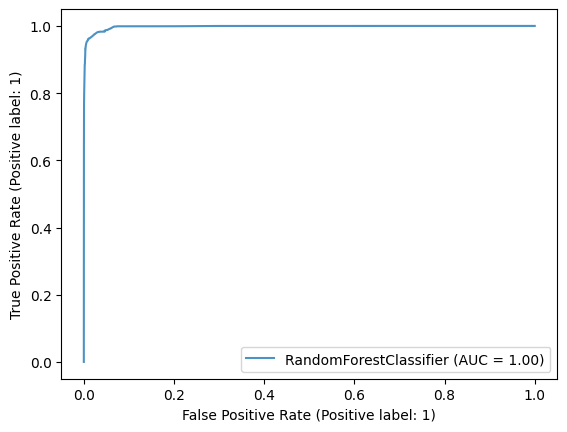

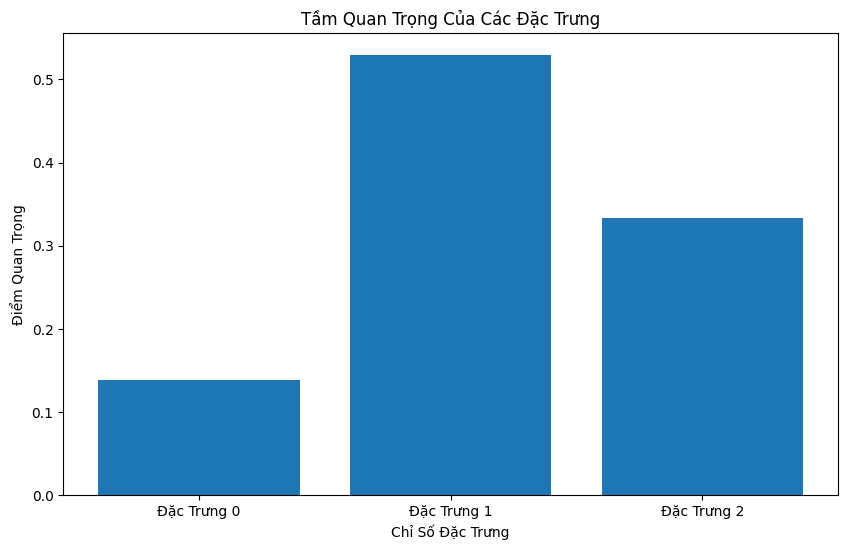

In [39]:
# Tạo và huấn luyện mô hình Random Forest
# Tạo dữ liệu giả lập với ... mẫu và 3 đặc trưng
x, y = make_classification(n_samples=5000, n_features=3,
                           n_informative=3, n_redundant=0,
                           random_state=0, shuffle=False)

# Khởi tạo mô hình Random Forest với 10 cây và độ sâu tối đa là 10
clf = RandomForestClassifier(n_estimators=10, max_depth=10)

# Huấn luyện mô hình trên dữ liệu huấn luyện
clf.fit(x_train, y_train)

# Tính điểm số (accuracy) của mô hình trên dữ liệu huấn luyện
score_rf = clf.score(x_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
predictions = clf.predict(x_test)

# In ra điểm số của mô hình
print("Score:", round(score_rf * 100, 2), '%')

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, predictions)

# Giải nén các giá trị từ ma trận nhầm lẫn
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

# In ra số lượng True Positive, False Positive, True Negative, False Negative
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

# Tính các tỷ lệ
TPR = TP / (TP + FN)  # Tỷ lệ True Positive
TNR = TN / (TN + FP)  # Tỷ lệ True Negative
FPR = FN / (TP + FN)  # Tỷ lệ False Positive
FNR = FN / (TN + FP)  # Tỷ lệ False Negative

# In ra các tỷ lệ
print('True Positive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Positive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

# Tính Precision và Recall
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Tính F1 Score
f1 = 2 * (precision * recall) / (precision + recall)

# In ra các điểm số
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score', precision)
print('Recall score: ', recall)
print('F1 score: ', f1)

# Tính độ chính xác (accuracy) của phân loại nhị phân
accuracy = (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

# In ra điểm số của mô hình trên dữ liệu huấn luyện và kiểm tra
print(f'model score on training data: {clf.score(x_train, y_train)}')
print(f'model score on testing data: {clf.score(x_test, y_test)}')

# Lấy độ quan trọng của các đặc trưng
importance = clf.feature_importances_

# In ra độ quan trọng của từng đặc trưng
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Lưu mô hình vào file
to_persist = ([x_test], [predictions])
joblib.dump(to_persist, '/home/hadoop/datasets/model/rf_model.joblib')

# Vẽ biểu đồ ROC cho mô hình Random Forest
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test, ax=ax, alpha=0.8)

# Trực quan hóa tầm quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance, align='center')
plt.xticks(range(len(importance)), ['Đặc Trưng ' + str(i) for i in range(len(importance))])
plt.title('Tầm Quan Trọng Của Các Đặc Trưng')
plt.xlabel('Chỉ Số Đặc Trưng')
plt.ylabel('Điểm Quan Trọng')
plt.show()


/home/hadoop/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


True Positive(TP)  =  236425
False Positive(FP) =  8666
True Negative(TN)  =  253677
False Negative(FN) =  25520
True Postive Rate (TPR) =  0.9025749680276394
True Negative Rate (TNR) =  0.9669669097326782
False Postive Rate (FPR) =  0.03303309026732179
False Negative Rate (FNR) =  0.0974250319723606
Accuracy score:  0.9347953796386719
Precision score 0.9646417045097535
Recall score:  0.9025749680276394
F1 score:  0.932576779558059
Accuracy of the binary classification = 0.935
model score on training data: 0.934546152750651
model score on testing data: 0.9347953796386719


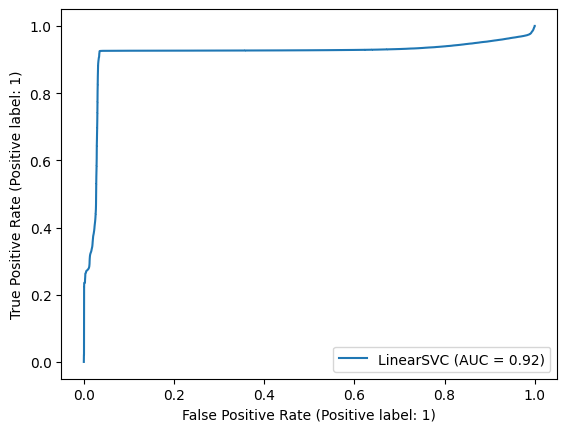

In [40]:
# Khởi tạo mô hình SVM (Support Vector Machine) sử dụng LinearSVC
SVM = svm.LinearSVC()

# Huấn luyện mô hình trên dữ liệu huấn luyện
SVM.fit(x_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
predictions = SVM.predict(x_test)

# Tính ma trận nhầm lẫn giữa nhãn thực tế và nhãn dự đoán
cm = confusion_matrix(y_test, predictions)

# Giải nén các giá trị từ ma trận nhầm lẫn
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

# In ra số lượng True Positive, False Positive, True Negative, False Negative
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

# Tính các tỷ lệ
TPR = TP / (TP + FN)  # Tỷ lệ True Positive
TNR = TN / (TN + FP)  # Tỷ lệ True Negative
FPR = FP / (FP + TN)  # Tỷ lệ False Positive
FNR = FN / (TP + FN)  # Tỷ lệ False Negative

# In ra các tỷ lệ
print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

# Tính Precision và Recall
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Tính F1 Score
f1 = 2 * (precision * recall) / (precision + recall)

# In ra các điểm số
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score', precision)
print('Recall score: ', recall)
print('F1 score: ', f1)

# Tính độ chính xác (accuracy) của phân loại nhị phân
accuracy = (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

# In ra điểm số của mô hình trên dữ liệu huấn luyện và kiểm tra
print(f'model score on training data: {SVM.score(x_train, y_train)}')
print(f'model score on testing data: {SVM.score(x_test, y_test)}')

# Lưu mô hình và các chỉ số vào file
to_persist = [('True Positve Rate: ', TPR), ('True Negative Rate: ', TNR), 
              ('False Positive Rate: ', FPR), ('False Negative Rate: ', FNR), 
              ('Accuracy: ', accuracy), (('Data:', 'Prediction:'), (x_test, predictions))]
joblib.dump(to_persist, '/home/hadoop/datasets/model/svm_model.joblib')

# Vẽ biểu đồ ROC cho mô hình SVM
svc_disp = RocCurveDisplay.from_estimator(SVM, x_test, y_test)
rfc_disp.plot(ax=ax, alpha=0.8)

In [44]:
# Huấn luyện và đánh giá mô hình sử dụng KNN
KNN = KNeighborsClassifier(n_neighbors=5)
# Khởi tạo mô hình KNN với số lượng hàng xóm là 5
KNN.fit(x_train, y_train)
# Huấn luyện mô hình trên dữ liệu huấn luyện
predictions = KNN.predict(x_test)
# Dự đoán nhãn cho dữ liệu kiểm tra
cm = confusion_matrix(y_test, predictions)
# Tính ma trận nhầm lẫn giữa nhãn thực tế và nhãn dự đoán

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
# Giải nén các giá trị từ ma trận nhầm lẫn

print('True Positive(TP)  = ', TP)
# In ra số lượng True Positive
print('False Positive(FP) = ', FP)
# In ra số lượng False Positive
print('True Negative(TN)  = ', TN)
# In ra số lượng True Negative
print('False Negative(FN) = ', FN)
# In ra số lượng False Negative

TPR = TP/(TP+FN)
# Tính tỷ lệ True Positive
TNR = TN/(TN+FP)
# Tính tỷ lệ True Negative
FPR = FN/(TP+FN)
# Tính tỷ lệ False Positive
FNR = FN/(TN+FP)
# Tính tỷ lệ False Negative

print('True Postive Rate (TPR) = ', TPR)
# In ra tỷ lệ True Positive
print('True Negative Rate (TNR) = ', TNR)
# In ra tỷ lệ True Negative
print('False Postive Rate (FPR) = ', FPR)
# In ra tỷ lệ False Positive
print('False Negative Rate (FNR) = ', FNR)
# In ra tỷ lệ False Negative

precision = precision_score(predictions, y_test)
# Tính Precision
recall = recall_score(predictions, y_test)
# Tính Recall
f1 = 2 * (precision * recall) / (precision + recall)
# Tính F1 Score

print('Accuracy score: ', accuracy_score(predictions, y_test))#tính accuracy_score
# In ra điểm số Accuracy
print('Precision score', precision_score(predictions, y_test))
# In ra điểm số Precision
print('Recall score: ', recall_score(predictions, y_test))
# In ra điểm số Recall
print('F1 score: ', f1)
# In ra điểm số F1

accuracy =  (TP+TN) /(TP+FP+TN+FN)
# Tính độ chính xác (accuracy) của phân loại nhị phân

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))
# In ra độ chính xác của phân loại nhị phân

# Lưu mô hình và các chỉ số vào file
joblib.dump(to_persist,'/home/hadoop/datasets/model/knn_model.joblib')


True Positive(TP)  =  257614
False Positive(FP) =  5075
True Negative(TN)  =  257268
False Negative(FN) =  4331
True Postive Rate (TPR) =  0.9834659947698945
True Negative Rate (TNR) =  0.980655096572045
False Postive Rate (FPR) =  0.016534005230105557
False Negative Rate (FNR) =  0.016508921526398646
Accuracy score:  0.9820594787597656
Precision score 0.9834659947698945
Recall score:  0.9806805766514776
F1 score:  0.9820713106661025
Accuracy of the binary classification = 0.982


['/home/hadoop/datasets/model/knn_model.joblib']

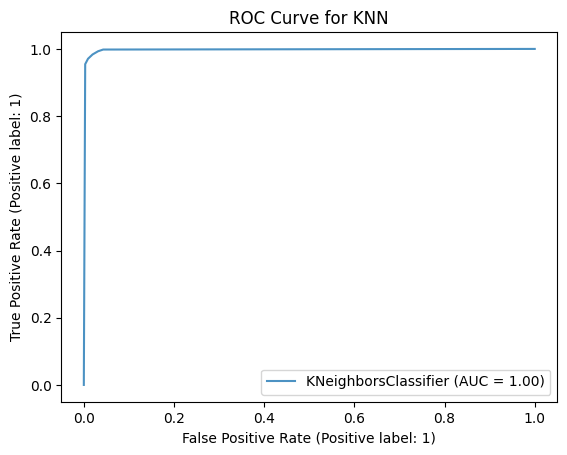

AUC for KNN: 0.997


In [45]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Tạo và hiển thị đường cong ROC
ax = plt.gca()  # Lấy trục hiện tại
knn_disp = RocCurveDisplay.from_estimator(KNN, x_test, y_test, ax=ax, alpha=0.8)
# Sử dụng RocCurveDisplay để vẽ ROC của mô hình KNN
plt.title("ROC Curve for KNN")
plt.show()

# Tính toán giá trị AUC (Area Under Curve)
auc = roc_auc_score(y_test, KNN.predict_proba(x_test)[:, 1])
print(f"AUC for KNN: {auc:.3f}")

True Positive(TP)  =  258946
False Positive(FP) =  3439
True Negative(TN)  =  258904
False Negative(FN) =  2999
True Postive Rate (TPR) =  0.9885510317051289
True Negative Rate (TNR) =  0.9868912073125641
False Postive Rate (FPR) =  0.013108792687435915
False Negative Rate (FNR) =  0.01144896829487106
Accuracy score:  0.9877204895019531
Precision score 0.9868933056386607
Recall score:  0.9885510317051289
F1 score:  0.9877214731180745
Accuracy of the binary classification = 0.988
Feature: 0, Score: 0.17552
Feature: 1, Score: 0.80719
Feature: 2, Score: 0.01729


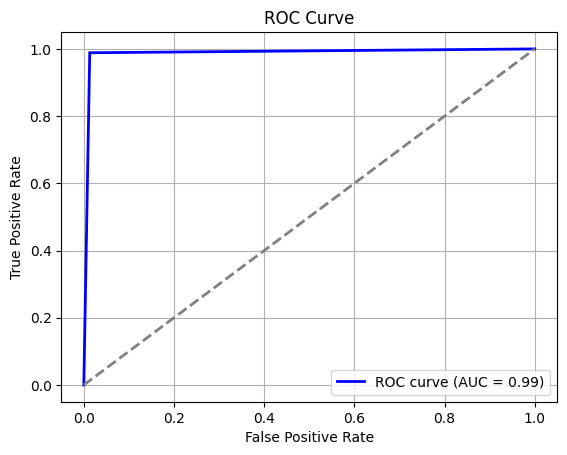

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn import tree

# Huấn luyện và đánh giá mô hình sử dụng cây quyết định
dt = tree.DecisionTreeClassifier()
# Khởi tạo mô hình cây quyết định
dt.fit(x_train, y_train)
# Huấn luyện mô hình trên dữ liệu huấn luyện
predictions = dt.predict(x_test)
# Dự đoán nhãn cho dữ liệu kiểm tra

cm = confusion_matrix(y_test, predictions)
# Tính ma trận nhầm lẫn giữa nhãn thực tế và nhãn dự đoán

TN, FP, FN, TP = cm.ravel()
# Giải nén các giá trị từ ma trận nhầm lẫn

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP / (TP + FN)
# Tính tỷ lệ True Positive
TNR = TN / (TN + FP)
# Tính tỷ lệ True Negative
FPR = FP / (FP + TN)
# Tính tỷ lệ False Positive
FNR = FN / (TP + FN)
# Tính tỷ lệ False Negative

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(y_test, predictions)
# Tính Precision
recall = recall_score(y_test, predictions)
# Tính Recall
f1 = 2 * (precision * recall) / (precision + recall)
# Tính F1 Score

print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score', precision)
print('Recall score: ', recall)
print('F1 score: ', f1)

accuracy = (TP + TN) / (TP + FP + TN + FN)
# Tính độ chính xác (accuracy) của phân loại nhị phân

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

# Lấy độ quan trọng của các đặc trưng
importance = dt.feature_importances_
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Lưu mô hình và các chỉ số vào file
to_persist = [('True Positve Rate: ', TPR), ('True Negative Rate: ', TNR), 
              ('False Positive Rate: ', FPR), ('False Negative Rate: ', FNR), 
              ('Accuracy: ', accuracy), (x_test, predictions)]
joblib.dump(to_persist, '/home/hadoop/datasets/model/dt_model.joblib')

# Plot ROC curve
y_pred_proba = dt.predict_proba(x_test)[:, 1]
# Lấy xác suất dự đoán cho lớp dương tính

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Tính giá trị FPR, TPR và thresholds

roc_auc = auc(fpr, tpr)
# Tính diện tích dưới đường cong ROC (AUC)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Đường baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
#KNN và SVM (Support Vector Machine) không trực tiếp cung cấp các thuộc tính hoặc phương thức để tính toán độ quan trọng của các đặc trưng như trong một số mô hình khác, chẳng hạn như Random Forest hay Gradient Boosting